# Week 3 Notebook: Exploratory Data Analysis (EDA)
The goal of this week's assignment is to split the dataset into training, validation, and test datasets, conduct exploratory data analysis (EDA) on the training data, and identify issues in the dataset that need to be fixed.

From last week's initial exploratory analysis, we identify several areas that require more analysis. Therefore, this notebook focuses on exploring our options for handling missing values and understanding our highly correlated independent variables. 

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

## Read data as dataframe

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

data_folder = os.path.join(parent_dir,"data")
raw_data_folder = os.path.join(data_folder,"raw")

uber_file_path = os.path.join(raw_data_folder, "uber.csv.zip")
lyft_file_path = os.path.join(raw_data_folder, "lyft.csv.zip")

In [3]:
if os.path.exists(uber_file_path):
    with zipfile.ZipFile(uber_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Uber file extracted to: {raw_data_folder}")
else:
    print(f"Uber file not found: {uber_file_path}")

if os.path.exists(lyft_file_path):
    with zipfile.ZipFile(lyft_file_path, 'r') as zip_ref:
        zip_ref.extractall(raw_data_folder)
    print(f"Lyft file extracted to: {raw_data_folder}")
else:
    print(f"Lyft file not found: {lyft_file_path}")

Uber file extracted to: /home/jupyter-xiagh/ADAN8888.01_Fall_24_Applied_Analytics_Project/data/raw
Lyft file extracted to: /home/jupyter-xiagh/ADAN8888.01_Fall_24_Applied_Analytics_Project/data/raw


In [4]:
uber_csv_path = os.path.join(raw_data_folder, "uber.csv")
lyft_csv_path = os.path.join(raw_data_folder, "lyft.csv")

uber_df = pd.read_csv(uber_csv_path)
lyft_df = pd.read_csv(lyft_csv_path)
    
df = pd.concat([uber_df, lyft_df], ignore_index=True)

## Split the dataset into training, testing, and validation sets
- training set is 70% of the dataframe
- validation set is 20% of the dataframe
- test set is 10% of the dataframe

In [5]:
def train_val_test_split(df):
    # Suffle the dataset and calculate the size of validation and test sets

    df = df.sample(frac=1, random_state=123)

    val_size = int(len(df) * 0.2)
    test_size = int(len(df) * 0.1)

    # Select rows based on the val_size and test_size to store as train set, val set, and test set
    train_df = df.iloc[val_size + test_size:]
    val_df = df.iloc[:val_size]
    test_df = df.iloc[val_size:val_size + test_size]
    return train_df, val_df, test_df

train_df, val_df, test_df = train_val_test_split(df)


In [6]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col = [
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']
num_col = [col for col in df.columns if col not in cat_col]

# Remove 'id' and 'datetime' from the list of column names
num_col = [col for col in num_col if col not in ['id', 'datetime']]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 9
num_col = 46



In [7]:
num_col

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

## Variables Exploration
### Target Variable Analysis

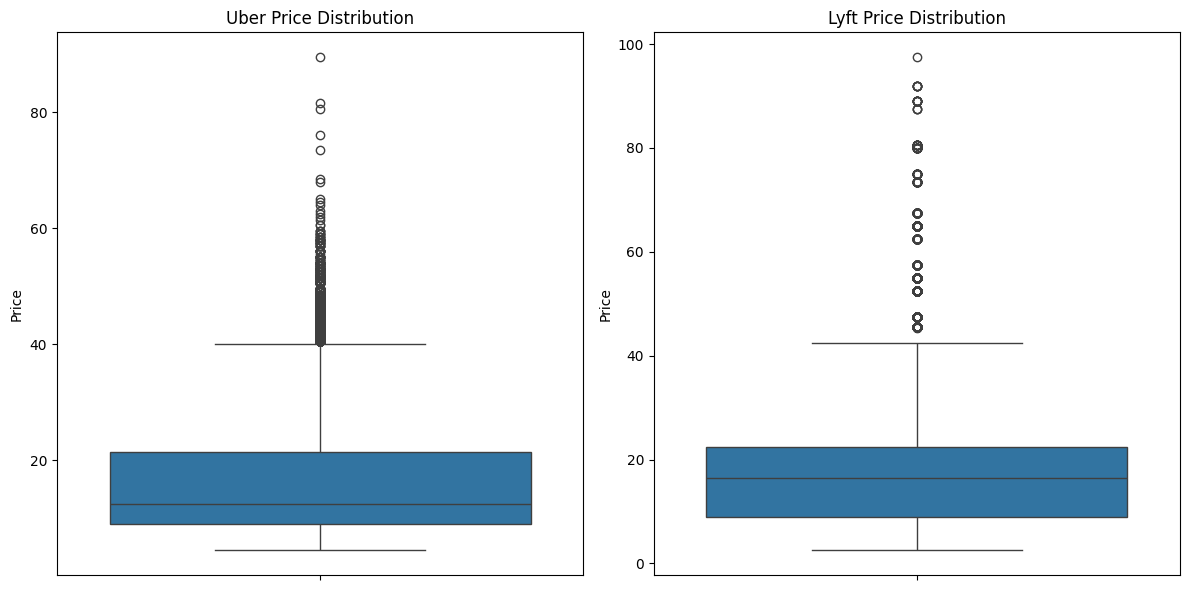

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

df_uber = train_df[train_df['cab_type']=='Uber']
df_lyft = train_df[train_df['cab_type']=='Lyft']

sns.boxplot(y='price', data=df_uber, ax=axes[0])
axes[0].set_title('Uber Price Distribution')
axes[0].set_ylabel('Price')


sns.boxplot(y='price', data=df_lyft, ax=axes[1])
axes[1].set_title('Lyft Price Distribution')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

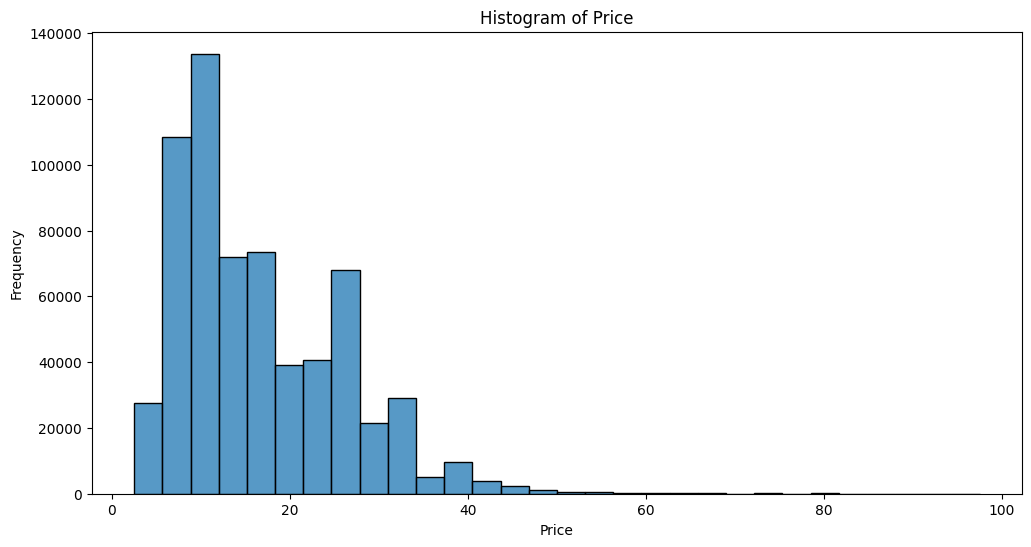

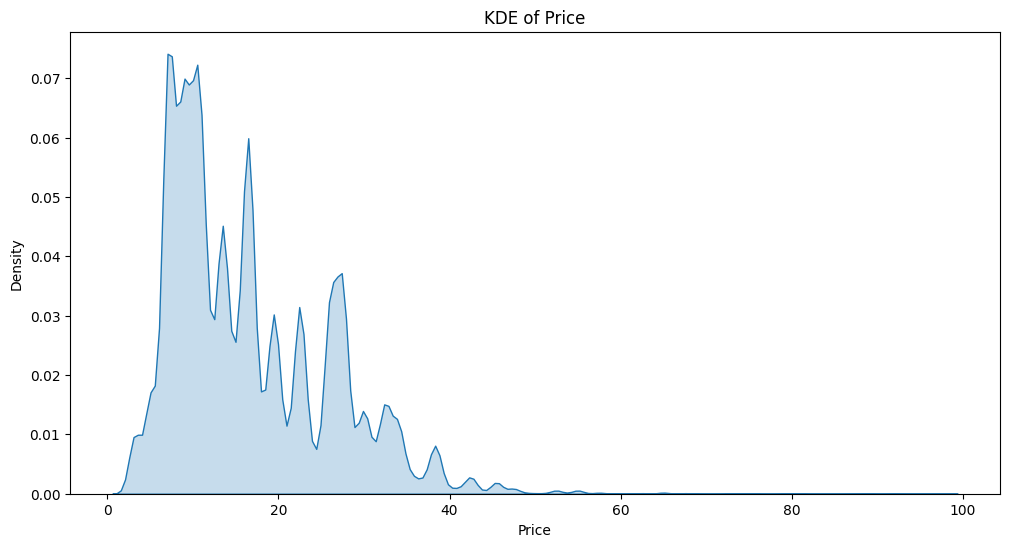

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=False)  # Change kde=True for a KDE plot
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# KDE for Price
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price'], fill=True)
plt.title('KDE of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

### Price vs Distance

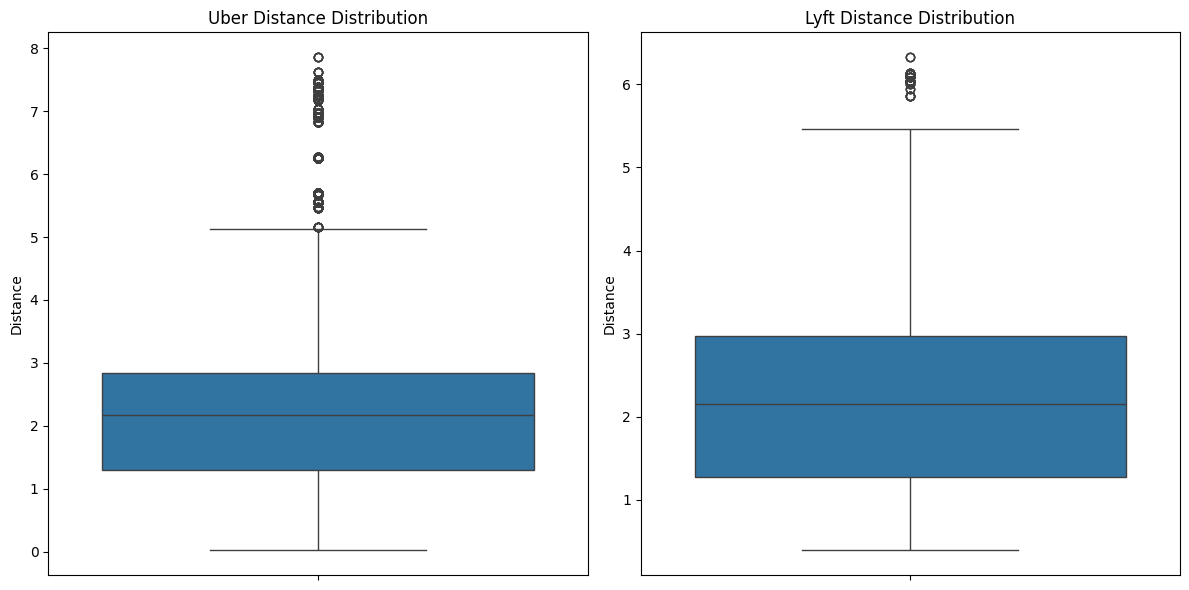

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

df_uber = train_df[train_df['cab_type']=='Uber']
df_lyft = train_df[train_df['cab_type']=='Lyft']

sns.boxplot(y='distance', data=df_uber, ax=axes[0])
axes[0].set_title('Uber Distance Distribution')
axes[0].set_ylabel('Distance')


sns.boxplot(y='distance', data=df_lyft, ax=axes[1])
axes[1].set_title('Lyft Distance Distribution')
axes[1].set_ylabel('Distance')

# Adjust layout
plt.tight_layout()

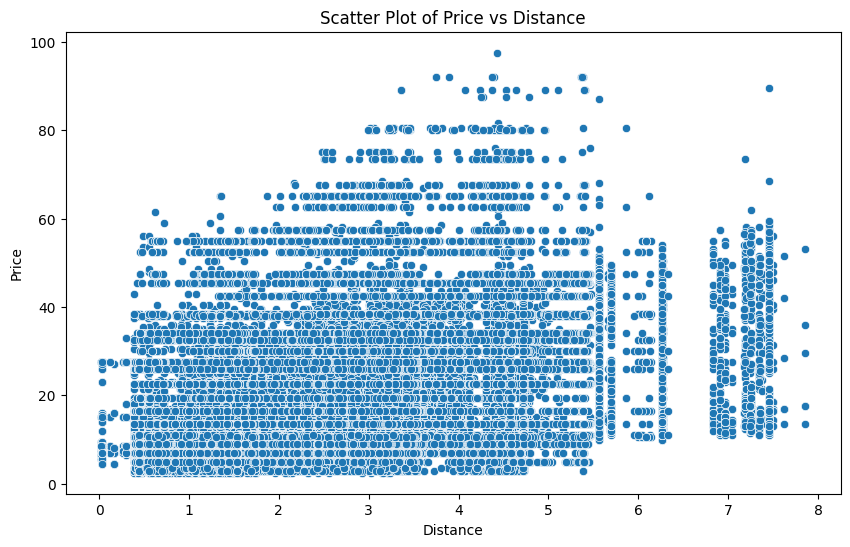

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=df)
plt.title('Scatter Plot of Price vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

### Relationships with Features

In [12]:
print("Summary Stats for Uber prices in the training dataset:")
print(df_uber[['price','distance']].describe())
print("")
print("Summary Stats for Lyft prices in the training dataset:")
print(df_lyft[['price','distance']].describe())

Summary Stats for Uber prices in the training dataset:
               price       distance
count  231430.000000  270112.000000
mean       15.784306       2.193145
std         8.558650       1.180632
min         4.500000       0.020000
25%         9.000000       1.300000
50%        12.500000       2.170000
75%        21.500000       2.840000
max        89.500000       7.860000

Summary Stats for Lyft prices in the training dataset:
               price       distance
count  215038.000000  215038.000000
mean       17.367391       2.188636
std        10.035548       1.085756
min         2.500000       0.390000
25%         9.000000       1.270000
50%        16.500000       2.150000
75%        22.500000       2.970000
max        97.500000       6.330000


### Relationships with other features
This cell might take some time to run.

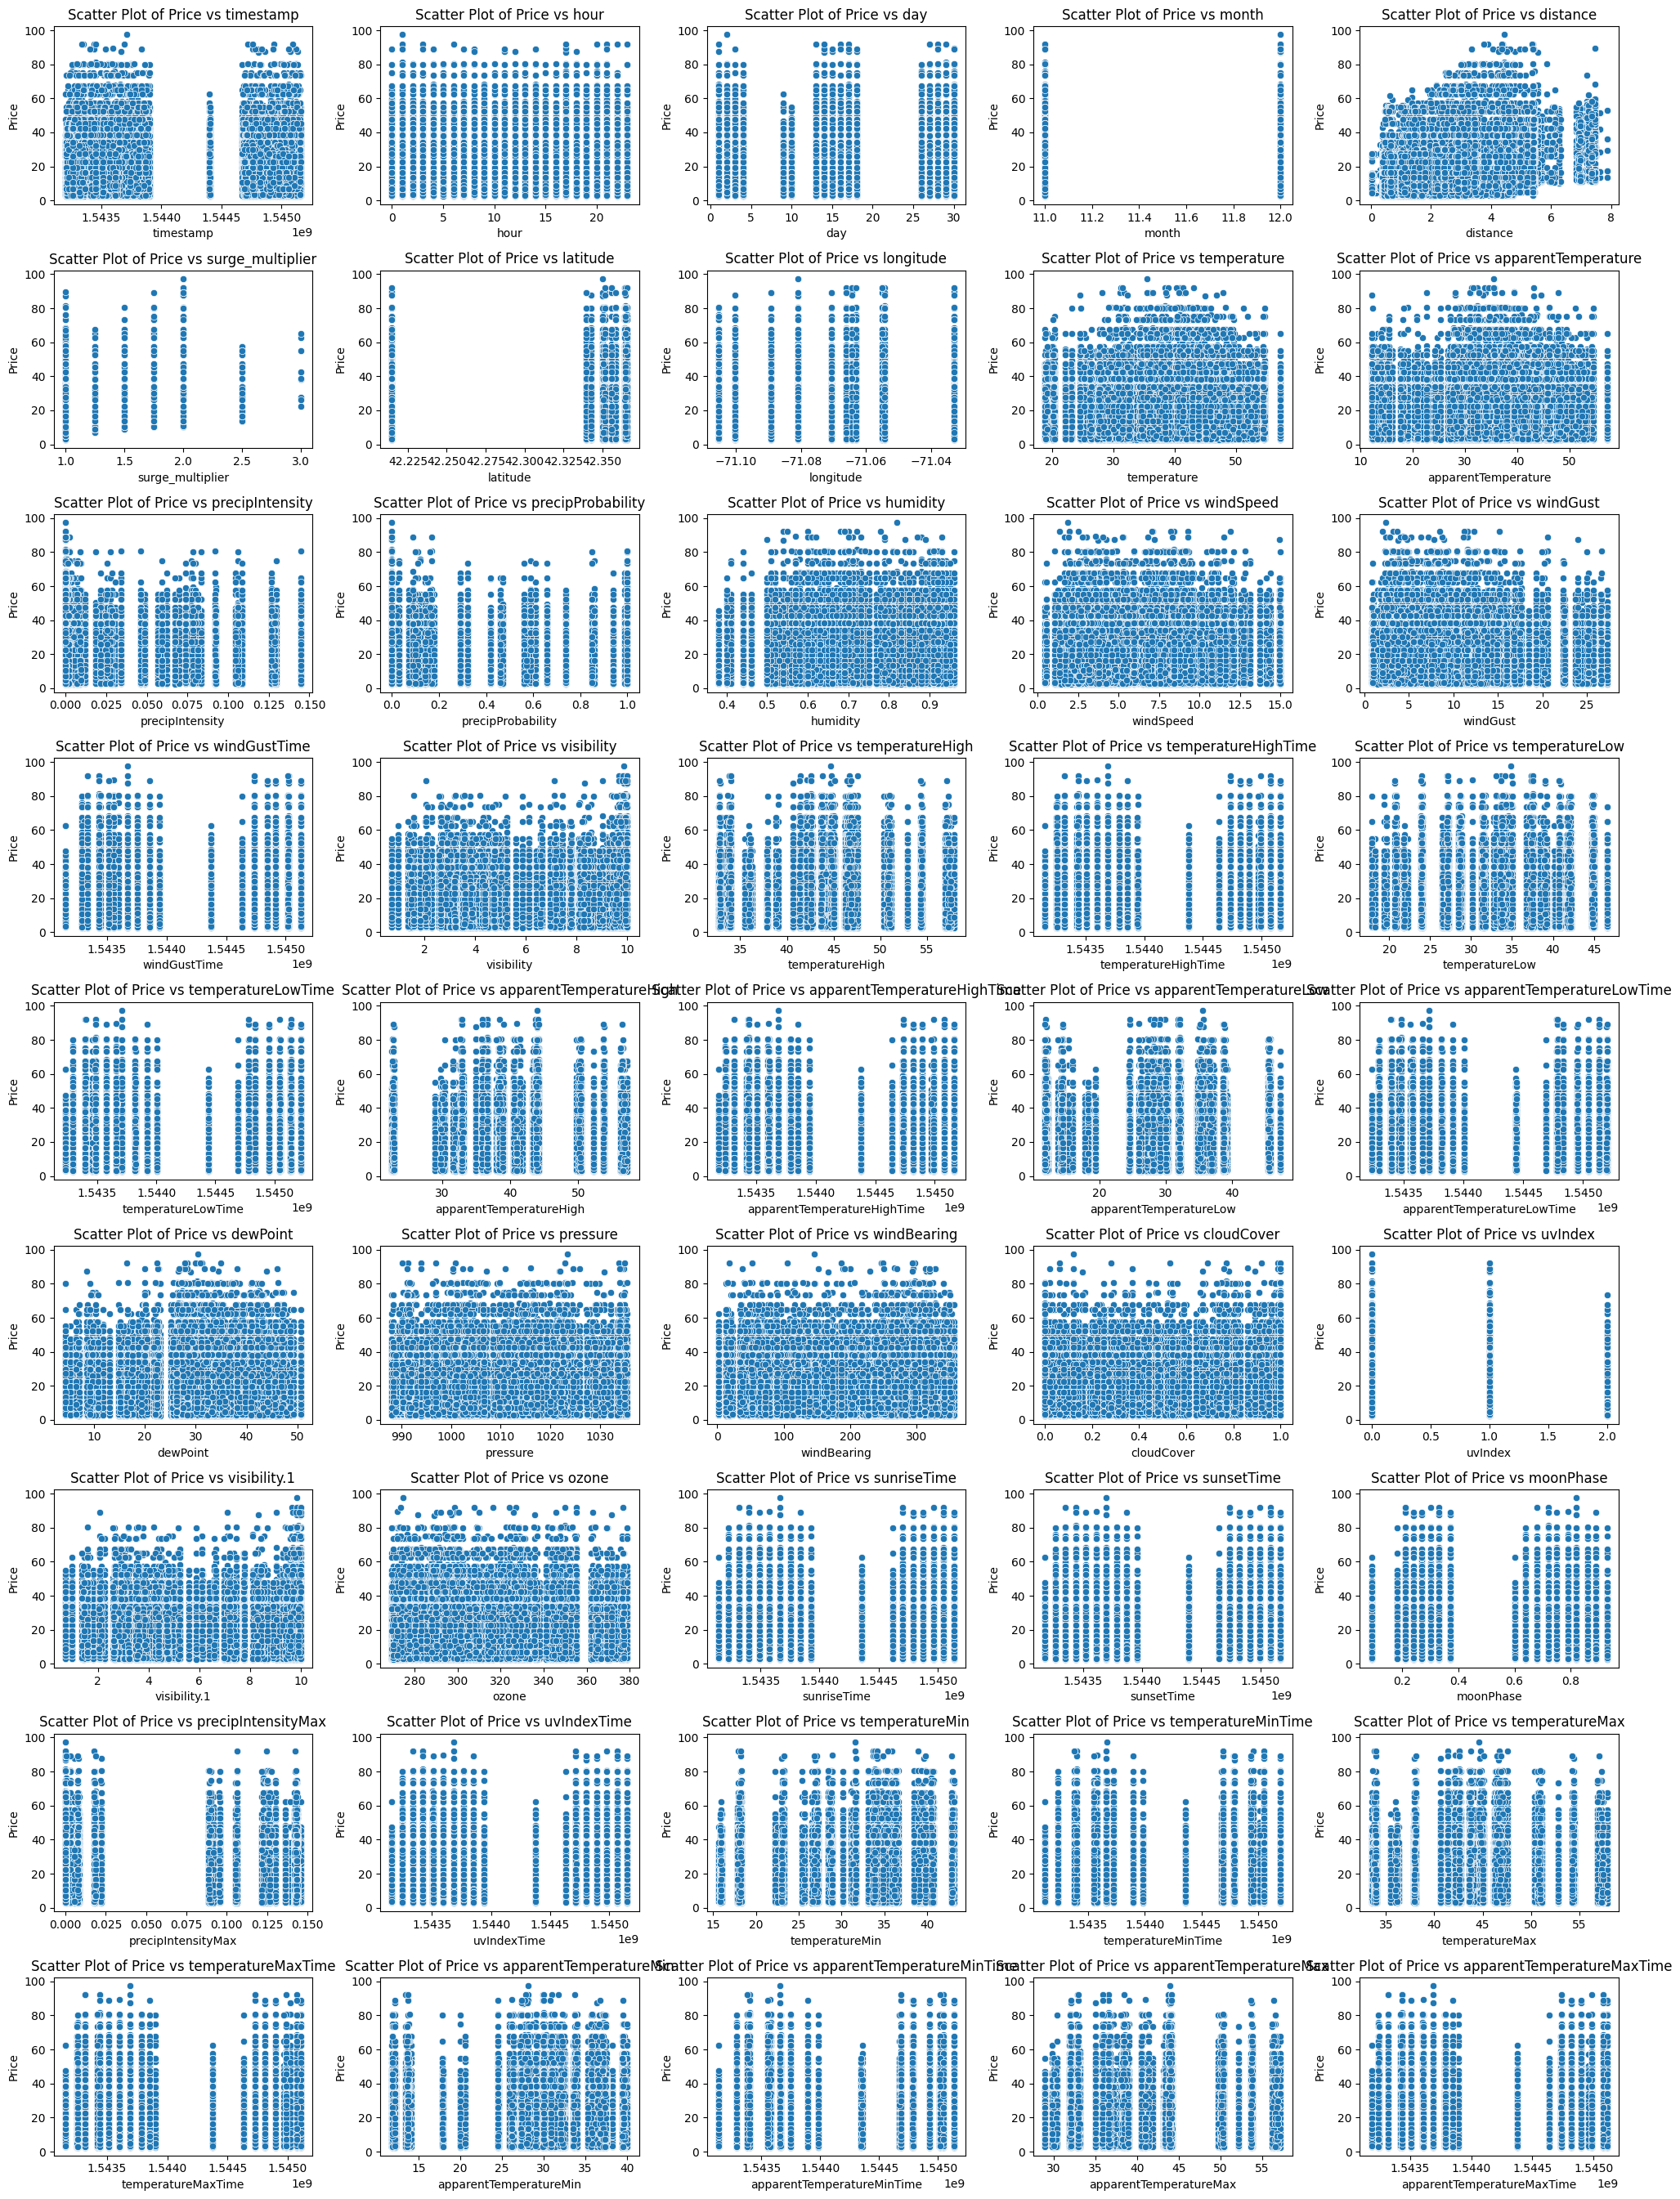

In [13]:
num_features = [col for col in num_col if col not in ['price']]
num_vars = len(num_features)

num_cols = 5
num_rows = (num_vars - 1) // num_cols + 1  # Integer division to calculate rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through numeric columns and create scatter plots
for i, col in enumerate(num_features):
    if col != 'price':  # Exclude price itself to avoid plotting against itself
        sns.scatterplot(x=df[col], y=df['price'], ax=axes[i])
        axes[i].set_title(f'Scatter Plot of Price vs {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Surge Multiplier

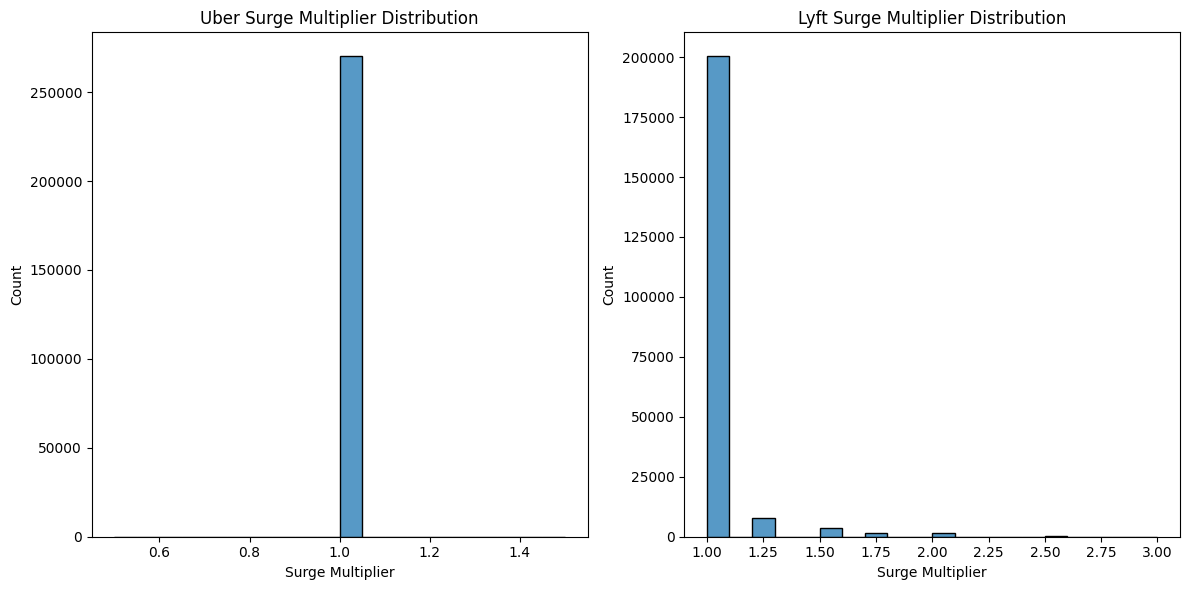

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Uber histogram
sns.histplot(df_uber['surge_multiplier'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Uber Surge Multiplier Distribution')
axes[0].set_xlabel('Surge Multiplier')

# Lyft histogram
sns.histplot(df_lyft['surge_multiplier'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Lyft Surge Multiplier Distribution')
axes[1].set_xlabel('Surge Multiplier')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Missing Value Investigation
- The target variable `price` has 55,095 missing values which we need to decide how to deal with in data preparation. 
- We can either impute it or drop the rows.
- Typically, another option is to drop a column if it has too many missing values. Since `price` is our dependent variable, this is not an option. 

In [15]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [16]:
df_na = df[df['price'].isna()]

In [17]:
df_na.head()

id     timestamp  hour  day  month  \
6   fa5fb705-03a0-4eb9-82d9-7fe80872f754  1.543674e+09    14    1     12   
13  eee70d94-6706-4b95-a8ce-0e34f0fa8f37  1.543795e+09    23    2     12   
17  7f47ff53-7cf2-4a6a-8049-83c90e042593  1.543524e+09    20   29     11   
21  43abdbe4-ab9e-4f39-afdc-31cfa375dc25  1.544732e+09    20   13     12   
30  80db1c49-9d51-4575-a4f4-1ec23b4d3e31  1.543583e+09    13   30     11   

               datetime          timezone         source    destination  \
6   2018-12-01 14:13:04  America/New_York      North End       West End   
13  2018-12-02 23:52:56  America/New_York    Beacon Hill  South Station   
17  2018-11-29 20:38:05  America/New_York  North Station         Fenway   
21  2018-12-13 20:10:16  America/New_York      North End       West End   
30  2018-11-30 13:08:03  America/New_York      North End    Beacon Hill   

   cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
6      Uber  ...             0.0000  1543683600           31.71   
13     Uber  ...             0.0904  1543770000           36.45   
17     Uber  ...             0.0000  1543510800           35.15   
21     Uber  ...             0.0001  1544716800           18.29   
30     Uber  ...             0.0003  1543593600           28.79   

    temperatureMinTime  temperatureMax  temperatureMaxTime  \
6           1543658400           44.66          1543690800   
13          1543726800           50.73          1543788000   
17          1543550400           44.66          1543510800   
21          1544688000           33.83          1544731200   
30          1543579200           42.52          1543600800   

    apparentTemperatureMin  apparentTemperatureMinTime  \
6                    28.06                  1543658400   
13                   35.85                  1543748400   
17                   30.98                  1543550400   
21                   13.79                  1544688000   
30                   26.41                  1543575600   

    apparentTemperatureMax apparentTemperatureMaxTime  
6                    43.99                 1543690800  
13                   50.06                 1543788000  
17                   38.30                 1543510800  
21                   32.85                 1544734800  
30                   40.53                 1543611600  

[5 rows x 57 columns]

In [18]:
# Check the percentage of missing values in 'price'
missing_percentage = df['price'].isna().sum() / len(df) * 100
print(f"Percentage of missing values in 'price': {missing_percentage:.2f}%")

Percentage of missing values in 'price': 7.95%


These 55,095 rows (roughly 8% of the dataframe) with missing values for `price` are one of the major obstacles of this dataset. 

### Visualization for Missing Values

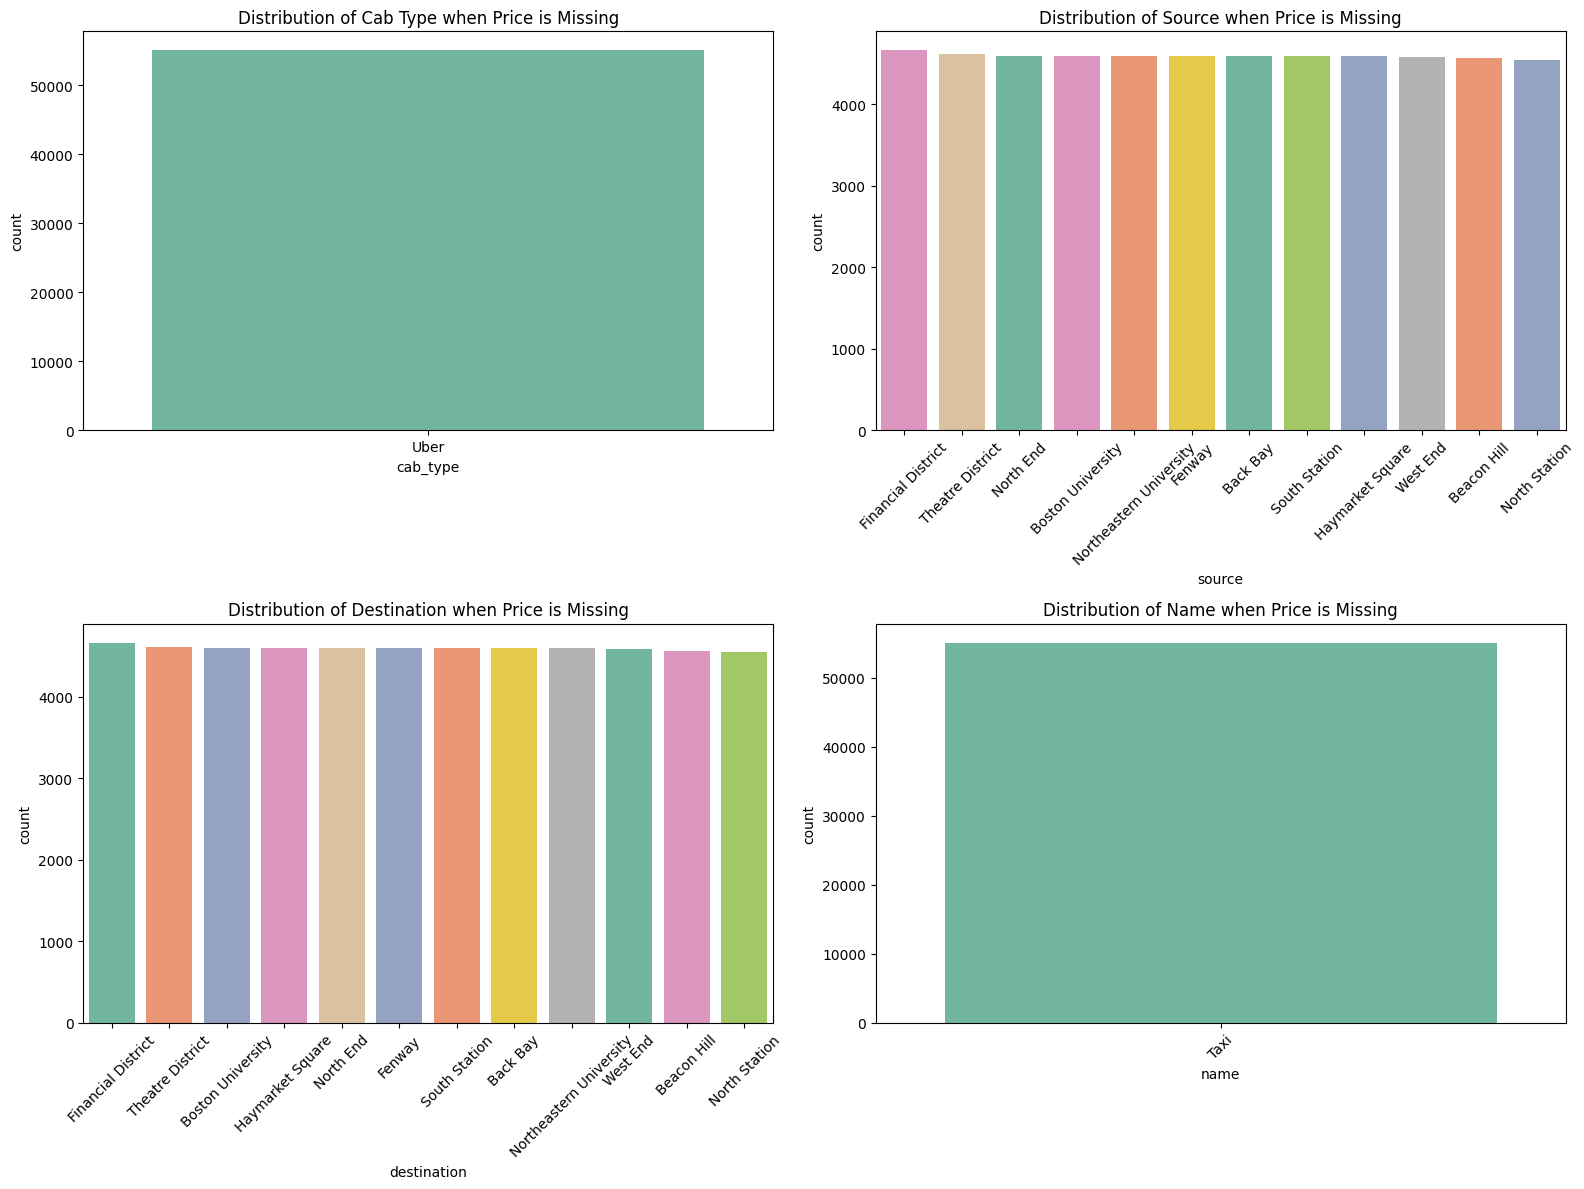

In [19]:
# Set up a 3x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of 'cab_type' when 'price' is missing
sns.countplot(x='cab_type', hue='cab_type', data=df_na, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Cab Type when Price is Missing')

# Distribution of 'source' when 'price' is missing
sns.countplot(x='source', hue='source', data=df_na, palette='Set2', order=df_na['source'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Source when Price is Missing')
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution of 'destination' when 'price' is missing
sns.countplot(x='destination', hue='destination', data=df_na, palette='Set2', order=df_na['destination'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Destination when Price is Missing')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution of 'name' when 'price' is missing
sns.countplot(x='name', hue='name', data=df_na, palette='Set2', order=df_na['name'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Name when Price is Missing')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


As illustrated in the graph, the only type of product trasaction that have missing price is Uber Taxi.

Other takaways:
- The distibutions of `source` and `destination` when `price` is missing are very evenly spread; there are almost exactly the same number of observations missing `price` for every individual `source` and `destination`.
- The value of `name` for all missing values is 'Taxi'. For `name`, the unique classes are: ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi'].

### Missing Value Imputation Methods Exploration
#### Option 1: Remove rows with missing `price` values.

In [20]:
df_dropped = df.dropna(subset=['price'])
print(f"Shape after dropping rows with missing 'price': {df_dropped.shape}")

Shape after dropping rows with missing 'price': (637976, 57)


#### Option 2: Fill missing `price` values with mean or median

In [21]:
# Fill with mean
df_filled_mean = df.copy()
df_filled_mean['price'] = df_filled_mean['price'].fillna(df_filled_mean['price'].mean())

# Fill with median
df_filled_median = df.copy()
df_filled_median['price'] = df_filled_median['price'].fillna(df_filled_median['price'].median())


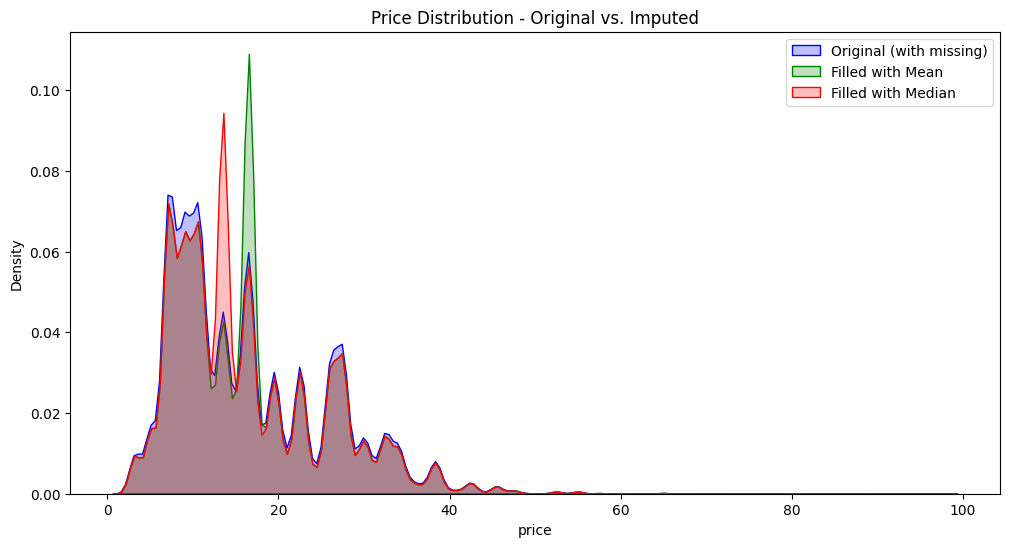

In [22]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price'], label='Original (with missing)', color='blue', fill=True)
sns.kdeplot(df_filled_mean['price'], label='Filled with Mean', color='green', fill=True)
sns.kdeplot(df_filled_median['price'], label='Filled with Median', color='red', fill=True)

plt.title('Price Distribution - Original vs. Imputed')
plt.legend()
plt.show()

#### Option 3: Model Imputation
Another way is to impute the missing price using model.

In [23]:
# First, check if all the Uber Taxi `Price` is missing.
df_taxi = df[df["name"]== "Taxi"]

df_taxi.describe()

timestamp          hour           day         month  price  \
count  5.509500e+04  55095.000000  55095.000000  55095.000000    0.0   
mean   1.544046e+09     11.626191     17.756040     11.588238    NaN   
std    6.890791e+05      6.940503      9.984649      0.492157    NaN   
min    1.543204e+09      0.000000      1.000000     11.000000    NaN   
25%    1.543444e+09      6.000000     13.000000     11.000000    NaN   
50%    1.543739e+09     12.000000     17.000000     12.000000    NaN   
75%    1.544828e+09     18.000000     28.000000     12.000000    NaN   
max    1.545161e+09     23.000000     30.000000     12.000000    NaN   

           distance  surge_multiplier      latitude     longitude  \
count  55095.000000           55095.0  55095.000000  55095.000000   
mean       2.191383               1.0     42.338303    -71.066230   
std        1.178985               0.0      0.047654      0.020286   
min        0.020000               1.0     42.214800    -71.105400   
25%        1.300000               1.0     42.350300    -71.081000   
50%        2.170000               1.0     42.351900    -71.063100   
75%        2.840000               1.0     42.364700    -71.054200   
max        7.860000               1.0     42.366100    -71.033000   

        temperature  ...  precipIntensityMax   uvIndexTime  temperatureMin  \
count  55095.000000  ...        55095.000000  5.509500e+04    55095.000000   
mean      39.607343  ...            0.037436  1.544045e+09       33.476342   
std        6.732861  ...            0.055190  6.909305e+05        6.477382   
min       18.910000  ...            0.000000  1.543162e+09       15.630000   
25%       36.500000  ...            0.000000  1.543421e+09       30.170000   
50%       40.550000  ...            0.000400  1.543770e+09       34.240000   
75%       43.610000  ...            0.091600  1.544807e+09       38.940000   
max       57.220000  ...            0.145900  1.545152e+09       43.100000   

       temperatureMinTime  temperatureMax  temperatureMaxTime  \
count        5.509500e+04    55095.000000        5.509500e+04   
mean         1.544042e+09       45.277155        1.544048e+09   
std          6.900481e+05        5.652388        6.898592e+05   
min          1.543122e+09       33.510000        1.543154e+09   
25%          1.543399e+09       42.570000        1.543439e+09   
50%          1.543727e+09       44.680000        1.543788e+09   
75%          1.544789e+09       46.910000        1.544814e+09   
max          1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count            55095.000000                5.509500e+04   
mean                29.753849                1.544049e+09   
std                  7.117307                6.870186e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count            55095.000000                5.509500e+04  
mean                42.014321                1.544049e+09  
std                  6.951950                6.907825e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

Since all taxi prices are missing, we can impute it with Boston Taxi rate. However, it is unclear whether calling a taxi through Uber is the same price as Taxi meter rate. The price of taxi could also be similar to regular Uber, so it is also possible to build a model to predict for the taxi ride based on those prices for the price ditributoin to be similar to the original one, in comparison .

Reference:
- https://police.boston.gov/taxi-rates/

## Correlation analysis

In [24]:
num_df = df[num_col]
correlation_matrix = num_df.corr()

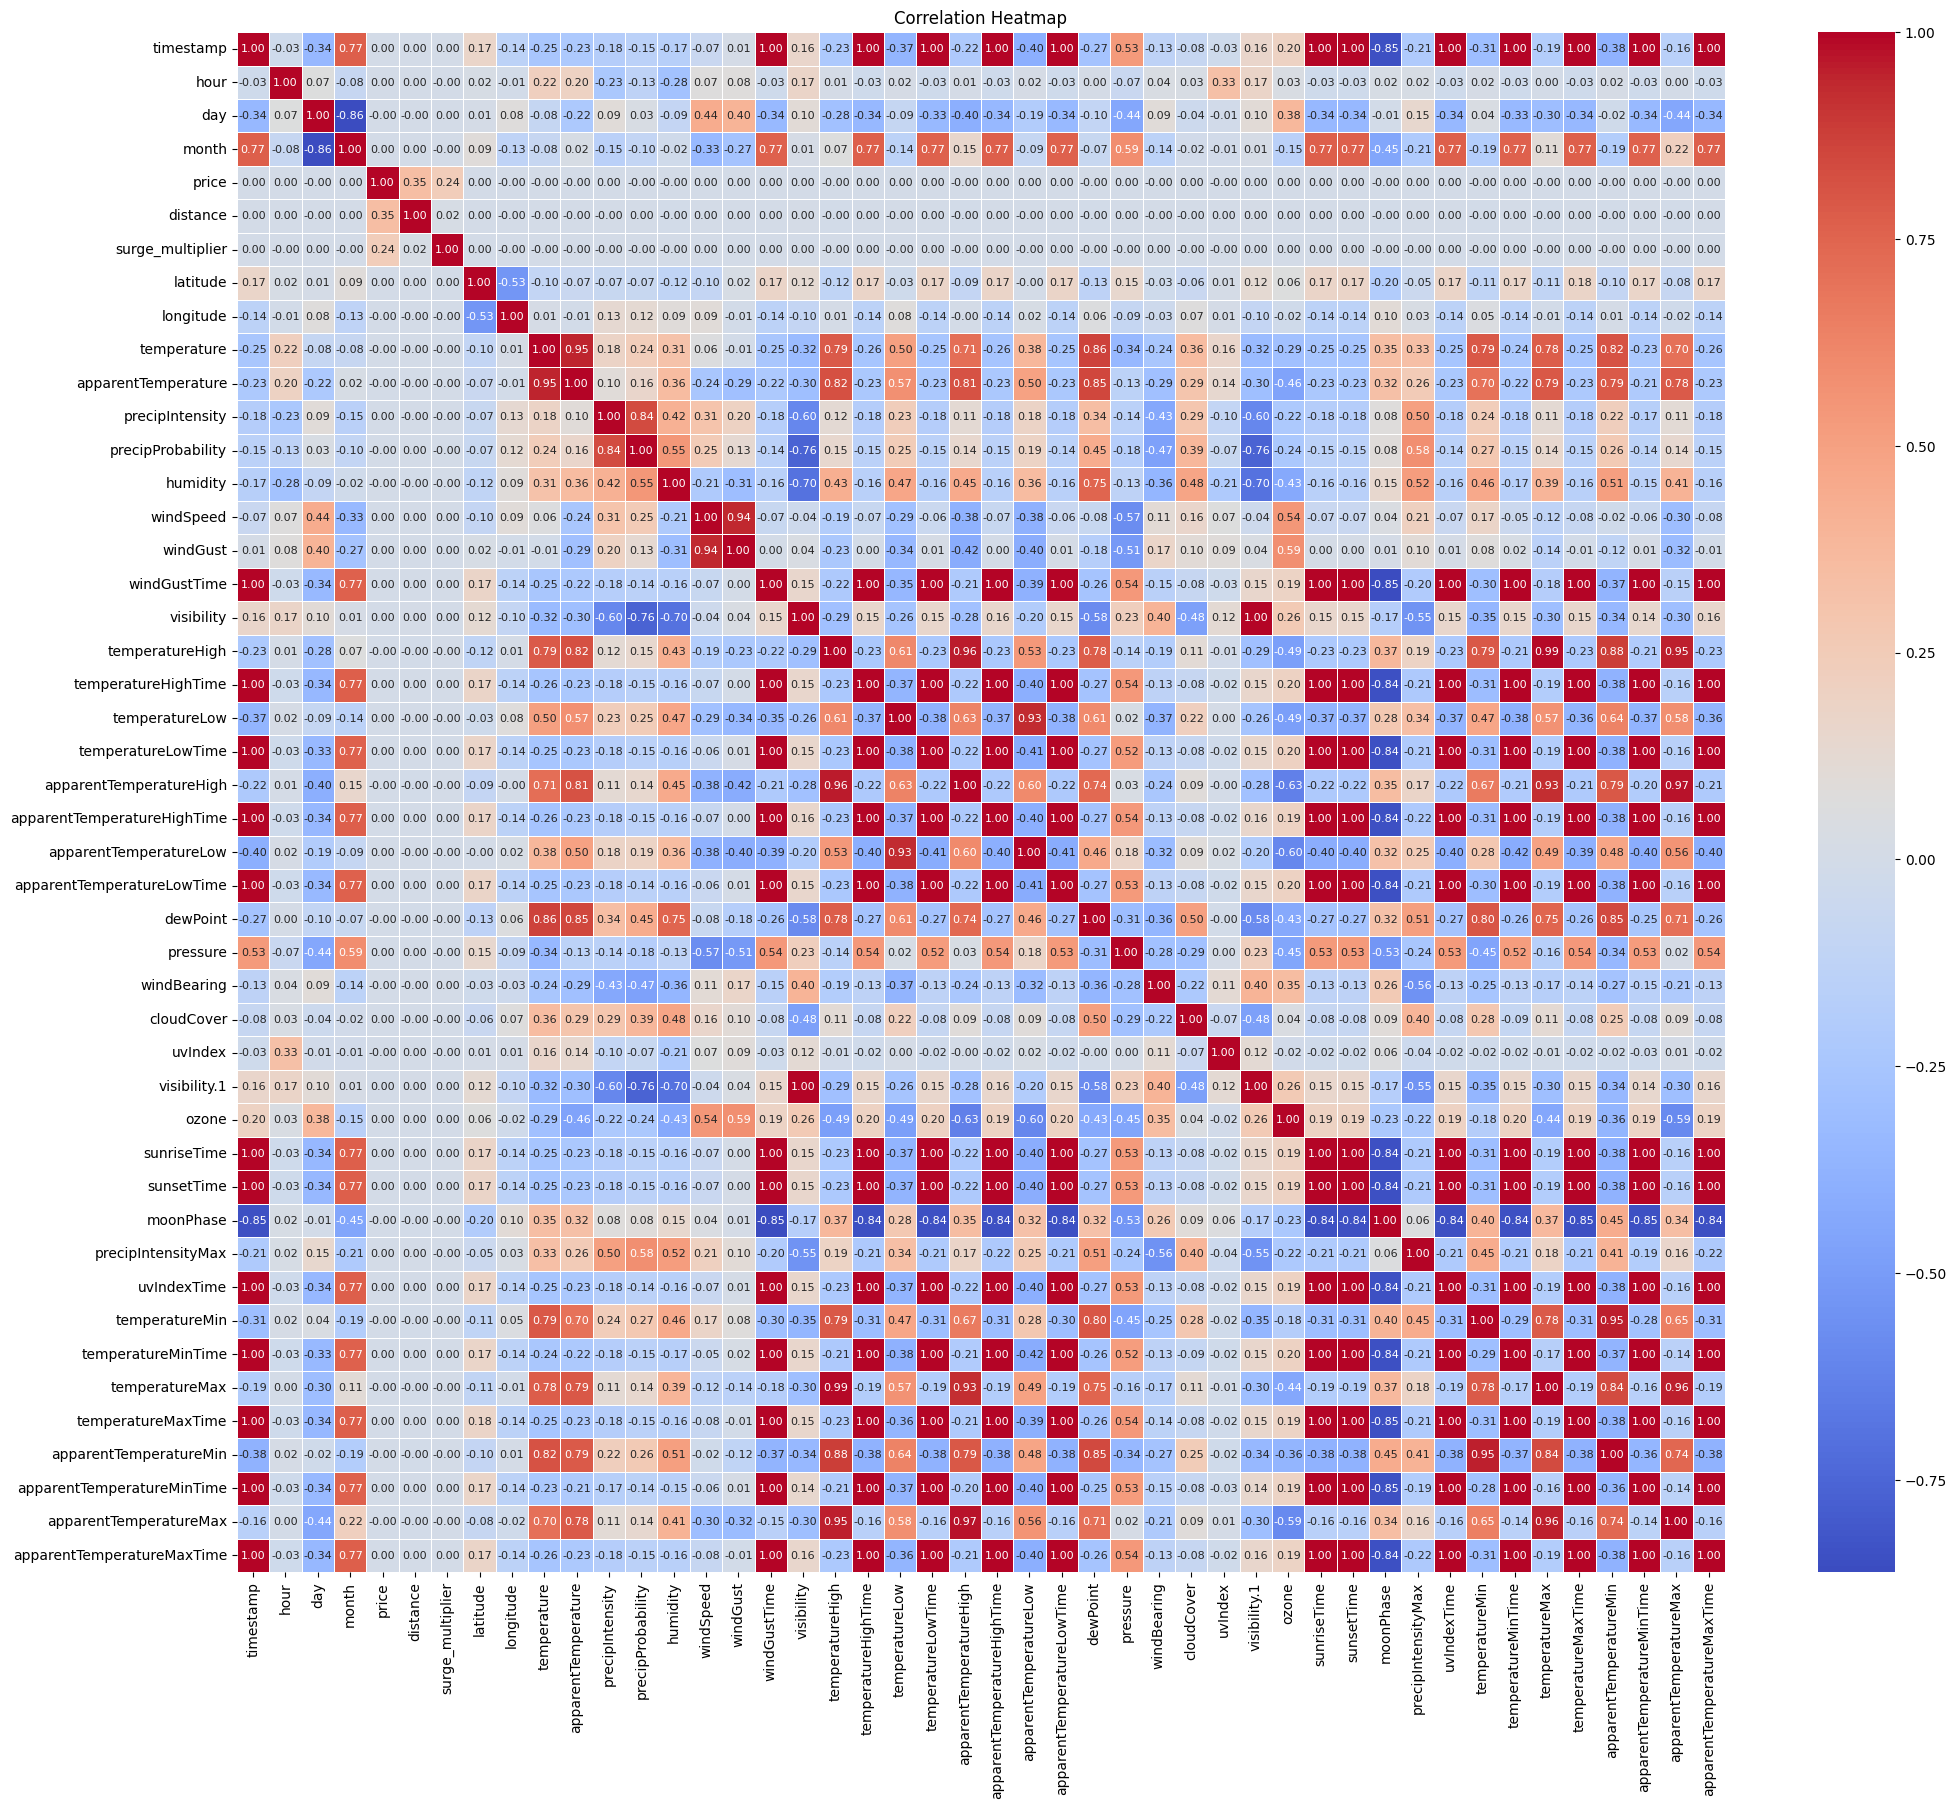

In [25]:
# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

In [26]:
num_df.corr().T.style.background_gradient()

A lot of vairables exhibit high correlation, and high correlation among variables can lead to multicollinearity, which can affect the performance and interpretability of regression models. It also indicates needs for feature engineering, and several methods we are considering to approach this problem is:
- Remove Highly Correlated Variables: Identify and drop one variable from each pair of highly correlated variables. However, this will likley result in loss of information when the model is trying to make precise prediction.
- Combine Variables using the average of the correlated variables or conducting Principal Component Analysis (PCA)
- We are also tring to apply regularization Techniques such as L1 or L2.
- Apply transformations like logarithmic or polynomial transformations to reduce correlation.
- In cases where two variables are highly correlated but both are important, we might also consider creating interaction terms to capture their joint effect.

Last but not the least, it is important to leverage domain knowledge to determine which variables are most relevant and should be retained.

In [27]:
# Potential variables to drop based on correlation threshold
threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop columns with high correlation
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
df_reduced = df.drop(columns=to_drop)
print(f"Dropped columns: {to_drop}")

Dropped columns: ['apparentTemperature', 'windGust', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
